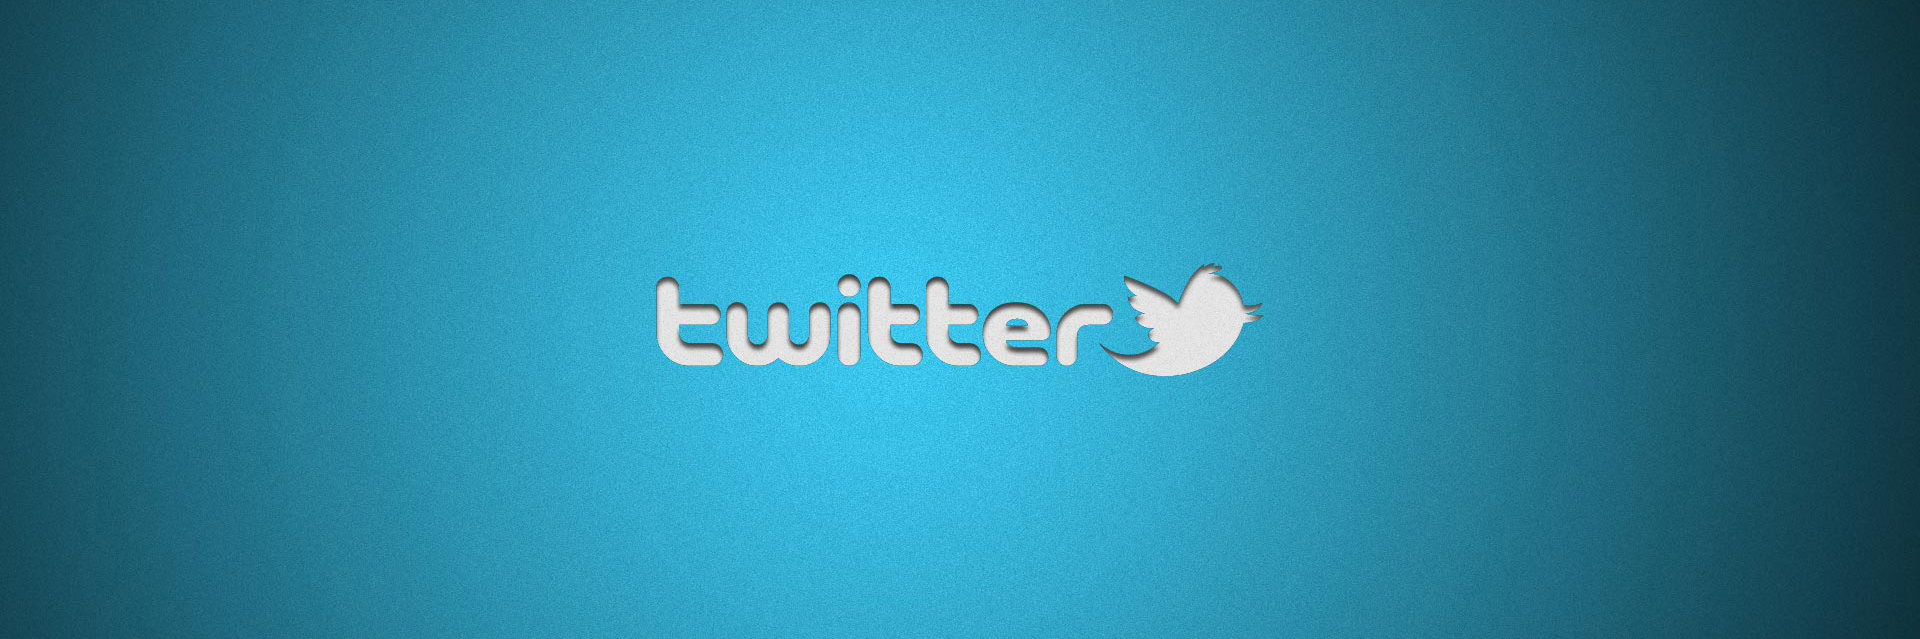

# Twitter Scraper - NLP (Natural Language Processing)
**By: Sameeha Ramadhan**

## What is Natural Language Processing, or _NLP_?

**Natural language processing (NLP)** refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can. NLP has become an essential business tool for uncovering hidden data insights from social media channels. Sentiment analysis can analyze language used in social media posts, responses, reviews, and more to extract attitudes and emotions in response to products, promotions, and events–information companies can use in product designs, advertising campaigns, and more. (1)

Twitter, along  with other social media platforms, represent an immense and largely untapped resource for data. An invaluable source of user information and public realtime data on almost every topic in today's world, Twitter remains the most popular platform for research, as it still provides its data via a number of APIs, or Application Programming Interfaces. (2)

A number of tools can be utilized using the data that Twitter provides us, including but not limited to Natural Language Understanding (NLU), which analyzes text in unstructured data formats.

This project will show how to scrape tweets related to COVID-19 from Twitter using Twitter APIs. In a separate notebook, I will demonstrate how to create an API Key, SecretAPIkey, Accesstoken and secret access token to securely store and use for scraping tweets.

# Import

To begin, I will first import the packages needed to build the scraper. These are **configparser**, which we will use to securely access our API keys, and **tweepy**, an easy-to-use Python library for accessing the Twitter API. To read the documentation on tweepy, click [here](https://docs.tweepy.org/en/stable/)

* **Note**: An API key or application programming interface key is a code that gets passed in by computer applications. The program or application then calls the API or application programming interface to identify its user, developer or calling program to a website. These are unique to the user and should not be publicly shared [More info](https://rapidapi.com/blog/api-glossary/api-key/#:~:text=An%20API%20key%20or%20application%20programming%20interface%20key,user%2C%20developer%20or%20calling%20program%20to%20a%20website.) 

In [ ]:
!pip uninstall tweepy

In [ ]:
pip install git+https://github.com/tweepy/tweepy.git

In [ ]:
import configparser
#!pip install tweepy <---Previously installed
import tweepy as tw

# Twitter Scraper

## Authorization

To begin I will create an object (here it is 'config') to securly read my API keys. This step is crucial as my keys are unique to my API and should not be exposed.

In [11]:
config = configparser.RawConfigParser()
config.read(filenames = 'keys.txt')

['keys.txt']

Next, I will use the .get() method to access the keys from my **config** object and assign each key to a variable. The **.get()** method  returns the value of the item with the specified key. (3)

In [12]:
accesstoken = config.get('keys','accesstoken') 
accesstokensecret = config.get('keys','accesstokensecret') 
apikey = config.get('keys','apikey') 
apisecretkey = config.get('keys','apisecretkey')

**Authentication** is the process of a user/subject proving its ownership of a presented identity, by providing a password or some other uniquely owned or presented factor (here would be our API keys). **Authorization** is the process of letting a subject access resources after a successful authentication, oftentimes somewhere else. Many people think that OAuth stands for open authentication, but it’s more helpful to understand it by thinking about it as open AUTHorization.

**OAuth** is an open-standard authorization protocol or framework that describes how unrelated servers and services can safely allow authenticated access to their assets without actually sharing the initial, related, single logon credential. (4)

I will now authenticate using **OAuthHandler**. (4))

In [13]:
auth = tw.OAuthHandler(apikey,apisecretkey)
auth.set_access_token(accesstoken,accesstokensecret) 
api = tw.API(auth,wait_on_rate_limit=True)

**Now we have successfully authenticated and connected with Twitter using APIs!**

## Scraping

Now we're ready to scrape!
The first step to this is to decide on the topic we want to research and then define the search word (here it is the hashtag), as well as the starting date from which we want to scrape tweets.

In [14]:
search_word = '#covid'
date_since = '2021-01-01'

To scrape the tweets I'll create a tweepy cursor, or an **iterator** (6) object and add the search parameters: the api object, my search word, the date since and the language. I'll set my scraper to access the first 1000 tweets.

In [ ]:
tweets = tw.Cursor(api.search_tweets, q = search_word, lang ='en',since = date_since).items(1000)

And finally, now that I've obtained the tweets related to covid, I'll access the details of these tweets by writing a for loop to dispaly the geo (combination of current location and recent location history), the actual tweet (tweet text), the user name, user location.

In [ ]:
tweet_info = [[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

And there we have it: a basic twitter scraper using Twitter's API!
Using this tool can help us generate important real time datasets which can be used for a number of research methods including Content Analysis, Machine learning, Time Series Analysis and more.

# References

(1) [What is NLP?](https://www.ibm.com/cloud/learn/natural-language-processing)

(2) [Using Twitter as a data source: an overview of social media research tools (2019)](https://blogs.lse.ac.uk/impactofsocialsciences/2019/06/18/using-twitter-as-a-data-source-an-overview-of-social-media-research-tools-2019/)

(3) [Python Dictionary get() Method](https://www.w3schools.com/python/ref_dictionary_get.asp)

(4) [What is OAuth? How the open authorization framework works](https://www.csoonline.com/article/3216404/what-is-oauth-how-the-open-authorization-framework-works.html)

(5) [OAuthHandler](https://docs.microsoft.com/en-us/dotnet/api/microsoft.aspnetcore.authentication.oauth.oauthhandler-1?view=aspnetcore-5.0)

(6) [Python Iterators](https://www.w3schools.com/python/python_iterators.asp)